In [14]:
import sys
import os
import glob
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import h5py

sys.path.insert(0,'/global/project/projectdirs/metatlas/anaconda/lib/python2.7/site-packages' )

sys.path.insert(1,'/global/homes/b/bpb/metaiq/')
import frag_molecule as frag

from rdkit import Chem
from rdkit.Chem import AllChem
from rdkit.Chem.rdMolDescriptors import CalcExactMolWt
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole

%matplotlib notebook


59.073499288
[H]N([H])C([H])([H])C([H])([H])C([H])([H])[H]


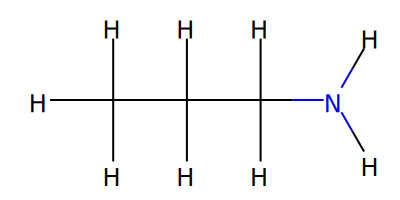

In [60]:
# inchi = 'InChI=1S/C2H7NO/c3-1-2-4/h4H,1-3H2' #ethanolamine
inchi = 'InChI=1S/C3H9N/c1-2-3-4/h2-4H2,1H3' #propylamine
# inchi = 'InChI=1S/C12H27N/c1-2-3-4-5-6-7-8-9-10-11-12-13/h2-13H2,1H3' #dodecylamine
# inchi = 'InChI=1S/C5H14NO/c1-6(2,3)4-5-7/h7H,4-5H2,1-3H3/q+1' #choline
# inchi = 'InChI=1S/C4H12N/c1-5(2,3)4/h1-4H3/q+1' #tetramethylammonium
# inchi = 'InChI=1S/C6H12O6/c7-1-2-3(8)4(9)5(10)6(11)12-2/h2-11H,1H2/t2-,3-,4+,5-,6?/m1/s1' #glucose
#baumin
# inchi = 'InChI=1S/C27H22O11/c1-36-23(34)12-16-11-21(32)24(26(37-16)14-4-7-18(29)20(31)9-14)25-22(33)10-15(38-27(25)35)5-2-13-3-6-17(28)19(30)8-13/h2-11,24,26,28-31,33H,12H2,1H3/b5-2+/t24-,26-/m1/s1'
mol = Chem.MolFromInchi(inchi)
print CalcExactMolWt(mol)
# print 12*4 + 14.003074 + 1.007825 * 12
m2 = AllChem.AddHs(mol)
print Chem.MolToSmiles(m2)
Draw.MolsToGridImage([m2],molsPerRow=1,useSVG=True,subImgSize=(400,200))


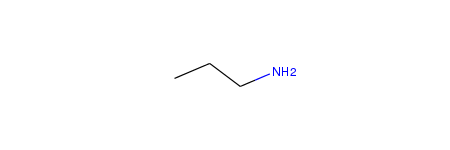

In [55]:
mol

In [51]:
Chem.MolFragmentToSmiles(mol,[2,3])

'CN'

In [41]:
frag = reload(frag)
f_tree = frag.FragTree(mol)
# print 'parent',f_tree.parent_smiles
# print 'parent mass',f_tree.parent_mass
# print
for i,f in enumerate(f_tree.fragment_list):
    print i,f


RDKit ERROR: [13:48:45] non-ring atom 2 marked aromatic


ValueError: Sanitization error: non-ring atom 2 marked aromatic

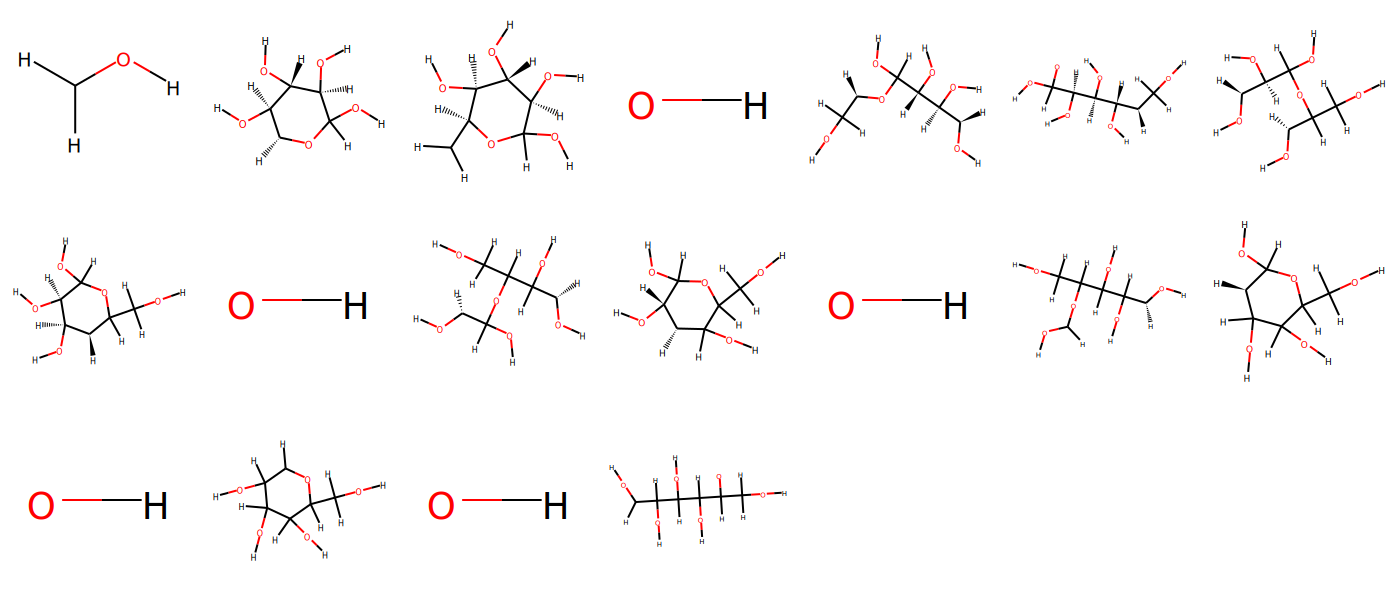

In [34]:
Draw.MolsToGridImage([f['frag_mol_h'] for f in f_tree.fragment_list],molsPerRow=7,useSVG=True)

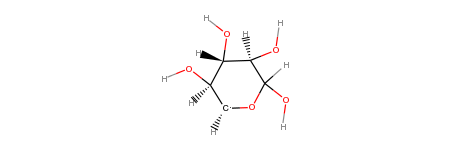

In [53]:
f_tree.fragment_list[1]['frag_mol_h']

In [36]:
f_tree_2 = frag.FragTree(f_tree.fragment_list[1]['frag_mol'])
# print 'parent',f_tree.parent_smiles
# print 'parent mass',f_tree.parent_mass
# print
for i,f in enumerate(f_tree_2.fragment_list):
    print i,f


0 {'frag_mol_h': <rdkit.Chem.rdchem.Mol object at 0x7f47b049d230>, 'frag_smiles': '[H][C]OC([H])(O[H])[C@]([H])(O[H])[C@@]([H])(O[H])[C]([H])O[H]', 'frag_mol': <rdkit.Chem.rdchem.Mol object at 0x7f47ad6cfc20>, 'fragment_mass': 149.044998388}
1 {'frag_mol_h': <rdkit.Chem.rdchem.Mol object at 0x7f47b049d320>, 'frag_smiles': '[H][C]~[C@]([H])(O[H])[C@]([H])(O[H])[C@@]([H])(O[H])C([H])([O])O[H]', 'frag_mol': <rdkit.Chem.rdchem.Mol object at 0x7f47ad6cf7c0>, 'fragment_mass': 149.044998388}
2 {'frag_mol_h': <rdkit.Chem.rdchem.Mol object at 0x7f47b049d2a8>, 'frag_smiles': '[H]O[C]([H])~[C]([H])~[O]C([H])(O[H])[C@]([H])(O[H])[C]([H])O[H]', 'frag_mol': <rdkit.Chem.rdchem.Mol object at 0x7f47ad6cffa0>, 'fragment_mass': 149.044998388}
3 {'frag_mol_h': <rdkit.Chem.rdchem.Mol object at 0x7f47b049d1b8>, 'frag_smiles': '[H]OC1([H])[O]~[C@]([H])~[C@@]([H])~[C@@]([H])(O[H])[C@@]1([H])O[H]', 'frag_mol': <rdkit.Chem.rdchem.Mol object at 0x7f47ad6cfe50>, 'fragment_mass': 132.042258736}
4 {'frag_mol_h': <r

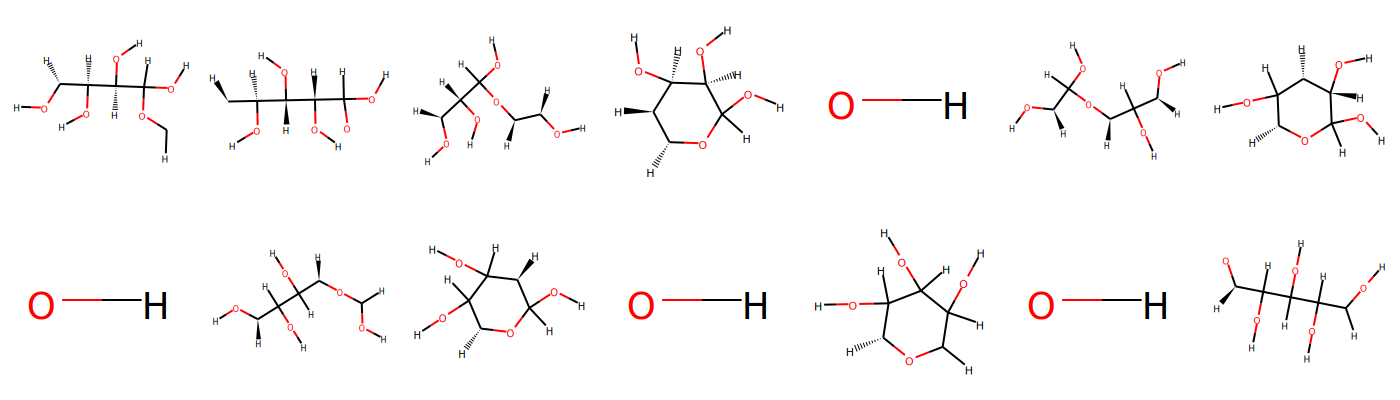

In [37]:
Draw.MolsToGridImage([f['frag_mol_h'] for f in f_tree_2.fragment_list],molsPerRow=7,useSVG=True)

In [38]:
f_tree_3 = frag.FragTree(f_tree_2.fragment_list[3]['frag_mol'])
# print 'parent',f_tree.parent_smiles
# print 'parent mass',f_tree.parent_mass
# print
for i,f in enumerate(f_tree_3.fragment_list):
    print i,f

0 {'frag_mol_h': <rdkit.Chem.rdchem.Mol object at 0x7f47b049daa0>, 'frag_smiles': '[H]O[C]([H])~[C]([H])~[C]([H])~[O]C([H])(O[H])[C]([H])O[H]', 'frag_mol': <rdkit.Chem.rdchem.Mol object at 0x7f47ad6cf9f0>, 'fragment_mass': 132.042258736}
1 {'frag_mol_h': <rdkit.Chem.rdchem.Mol object at 0x7f47b049db90>, 'frag_smiles': '[H]OC1([H])[O]~[C@]([H])~[C@@]([H])~[C@]([H])~[C@]1([H])O[H]', 'frag_mol': <rdkit.Chem.rdchem.Mol object at 0x7f47ad4df050>, 'fragment_mass': 115.039519084}
2 {'frag_mol_h': <rdkit.Chem.rdchem.Mol object at 0x7f47b049db18>, 'frag_smiles': '[H][O]', 'frag_mol': <rdkit.Chem.rdchem.Mol object at 0x7f47ad4df0c0>, 'fragment_mass': 17.002739652}
3 {'frag_mol_h': <rdkit.Chem.rdchem.Mol object at 0x7f47b049da28>, 'frag_smiles': '[H][O]~[C@]([H])(~[C]([H])~[C]([H])~[O][C]([H])O[H])~[C]([H])O[H]', 'frag_mol': <rdkit.Chem.rdchem.Mol object at 0x7f47ad4df440>, 'fragment_mass': 132.042258736}
4 {'frag_mol_h': <rdkit.Chem.rdchem.Mol object at 0x7f47af849050>, 'frag_smiles': '[H]O[C]1(